In [3]:
from IPython.display import Image


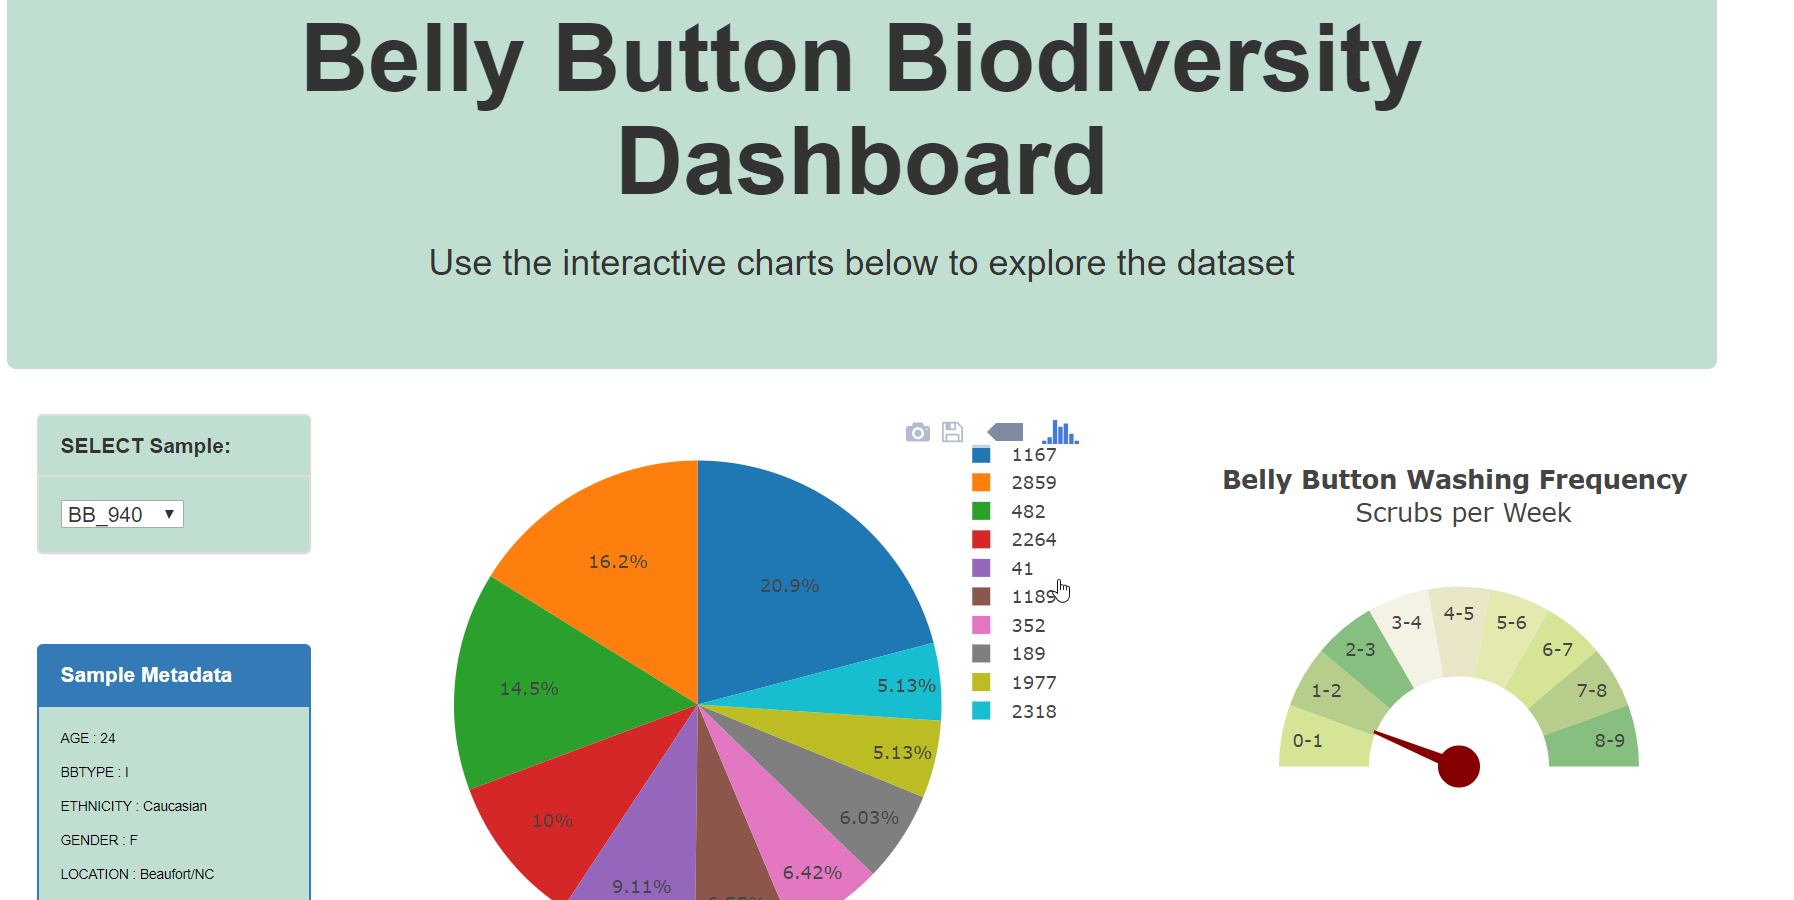

In [4]:
Image(filename='assignment_output1.png') 


In [5]:
# Import SQLAlchemy and other dependencies 
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
import pandas as pd
from sqlalchemy import Column, Integer, String, Float, Text, ForeignKey
import numpy as np
from sqlalchemy import MetaData
from sqlalchemy import Table

In [6]:
# Create engine using the `sqlite` database file created in database_engineering steps
engine = create_engine("sqlite:///belly_button_biodiversity.sqlite")

In [7]:
# Declare a Base using automap_base()
        
Base = automap_base()

In [8]:
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [9]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

# Collect the names of tables within the database
inspector.get_table_names()

['otu', 'samples', 'samples_metadata']

In [10]:
inspector.get_columns('otu')


[{'autoincrement': 'auto',
  'default': None,
  'name': 'otu_id',
  'nullable': False,
  'primary_key': 1,
  'type': INTEGER()},
 {'autoincrement': 'auto',
  'default': None,
  'name': 'lowest_taxonomic_unit_found',
  'nullable': True,
  'primary_key': 0,
  'type': TEXT()}]

In [11]:
inspector.get_columns('samples')


[{'autoincrement': 'auto',
  'default': None,
  'name': 'otu_id',
  'nullable': False,
  'primary_key': 1,
  'type': INTEGER()},
 {'autoincrement': 'auto',
  'default': None,
  'name': 'BB_940',
  'nullable': True,
  'primary_key': 0,
  'type': INTEGER()},
 {'autoincrement': 'auto',
  'default': None,
  'name': 'BB_941',
  'nullable': True,
  'primary_key': 0,
  'type': INTEGER()},
 {'autoincrement': 'auto',
  'default': None,
  'name': 'BB_943',
  'nullable': True,
  'primary_key': 0,
  'type': INTEGER()},
 {'autoincrement': 'auto',
  'default': None,
  'name': 'BB_944',
  'nullable': True,
  'primary_key': 0,
  'type': INTEGER()},
 {'autoincrement': 'auto',
  'default': None,
  'name': 'BB_945',
  'nullable': True,
  'primary_key': 0,
  'type': INTEGER()},
 {'autoincrement': 'auto',
  'default': None,
  'name': 'BB_946',
  'nullable': True,
  'primary_key': 0,
  'type': INTEGER()},
 {'autoincrement': 'auto',
  'default': None,
  'name': 'BB_947',
  'nullable': True,
  'primary_key': 

In [12]:
inspector.get_columns('samples_metadata')[0]


{'autoincrement': 'auto',
 'default': None,
 'name': 'SAMPLEID',
 'nullable': False,
 'primary_key': 1,
 'type': INTEGER()}

In [13]:
engine.execute('SELECT * FROM otu LIMIT 10').fetchall()


[(1, 'Archaea;Euryarchaeota;Halobacteria;Halobacteriales;Halobacteriaceae;Halococcus'),
 (2, 'Archaea;Euryarchaeota;Halobacteria;Halobacteriales;Halobacteriaceae;Halococcus'),
 (3, 'Archaea;Euryarchaeota;Halobacteria;Halobacteriales;Halobacteriaceae;Natronorubrum'),
 (4, 'Archaea;Euryarchaeota;Methanobacteria;Methanobacteriales;Methanobacteriaceae;Methanobrevibacter'),
 (5, 'Archaea;Euryarchaeota;Methanobacteria;Methanobacteriales;Methanobacteriaceae;Methanobrevibacter'),
 (6, 'Archaea;Euryarchaeota;Methanobacteria;Methanobacteriales;Methanobacteriaceae;Methanobrevibacter'),
 (7, 'Bacteria'),
 (8, 'Bacteria'),
 (9, 'Bacteria'),
 (10, 'Bacteria')]

In [14]:
engine.execute('SELECT * FROM samples LIMIT 1').fetchall()


[(1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)]

In [15]:
engine.execute('SELECT * FROM samples_metadata LIMIT 3').fetchall()


[(940, 'BellyButtonsScienceOnline', 'Caucasian', 'F', 24, 2, 'I', 'Beaufort/NC', 'usa', 22306, 'usa', 22306, 'no', 'no', 8852, 37.17222214, 54.5, 0.0, 1, 0.0, 33.99000168, 25.5),
 (941, '0', 'Caucasian/Midleastern', 'F', 34, 1, 'I', 'Chicago/IL', '0', 0, '0', 0, '0', '0', 0, 0.0, 0.0, 0.0, 0, 0.0, 0.0, 0.0),
 (943, 'BellyButtonsScienceOnline', 'Caucasian', 'F', 49, 1, 'I', 'Omaha/NE', '0', 0, '0', 0, '0', '0', 0, 0.0, 0.0, 0.0, 0, 0.0, 0.0, 0.0)]

In [16]:
test = engine.execute('SELECT ETHNICITY FROM samples_metadata').fetchall()
test

[('Caucasian',),
 ('Caucasian/Midleastern',),
 ('Caucasian',),
 ('European',),
 ('Caucasian',),
 ('Caucasian',),
 ('Caucasian',),
 ('Caucasian',),
 ('Caucasian',),
 ('Caucasian',),
 ('Caucasian',),
 ('Caucasian',),
 ('Caucasian',),
 ('Caucasian',),
 ('Caucasian',),
 ('Caucasian',),
 ('Caucasian',),
 ('Caucasian',),
 ('Caucasian',),
 ('Caucasian',),
 ('Caucasian',),
 ('Caucasian',),
 ('Caucasian',),
 ('Caucasian/Jewish',),
 ('Caucasian',),
 ('Caucasian/Asian',),
 ('Caucasian',),
 ('Asian(South)',),
 ('Caucasian',),
 ('Caucasian',),
 ('Caucasian',),
 ('Caucasian',),
 ('Hispanic',),
 ('Caucasian',),
 ('Caucasian',),
 ('Caucasian',),
 ('Caucasian',),
 ('Caucasian',),
 ('Caucasian',),
 ('Caucasian',),
 ('Caucasian',),
 ('Caucasian',),
 ('Caucasian',),
 ('Caucasian',),
 ('Caucasian',),
 ('Caucasian',),
 ('Caucasian',),
 ('Caucasian',),
 ('Caucasian',),
 ('Caucasian',),
 ('Caucasian',),
 ('Caucasian',),
 ('Caucasian',),
 ('0',),
 ('Black',),
 ('PacificIslander',),
 ('Caucasian',),
 ('Caucasia